In [1]:
import os
import numpy as np
from source_code.image_transformer import ImageTransformer
import torchvision.transforms as transforms
from source_code.generate import convert_jpg_to_png, prepare_foreground, select_background, find_position, get_angles, augmentation_logic
from source_code.generate import SOURCE_DIR, BORDER_SIZE, IMG_SHAPE

In [2]:
if not os.path.exists("./data/converted/"):
    convert_jpg_to_png()
else:
    print("CONVERTED IMAGES ALREADY EXIST")

cards = []
for card in os.listdir(f'./data/{SOURCE_DIR}/'):
    cards.append(f'./data/{SOURCE_DIR}/{card}')

CONVERTED IMAGES ALREADY EXIST


In [3]:
path = cards[0]
path

'./data/converted/1.png'

In [4]:
img, copy = prepare_foreground(path, IMG_SHAPE)
img.size, copy.size

((222, 310), (222, 310))

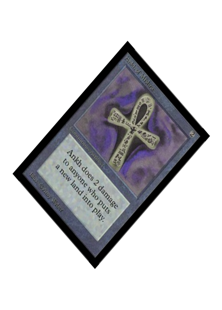

In [5]:
img

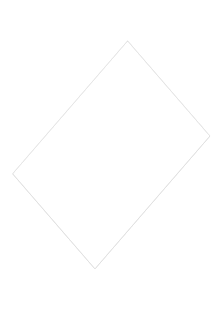

In [6]:
copy

In [7]:
copy.size

(222, 310)

In [8]:
find_position(copy, treshold=None)

array([ 14,  42, 195, 225])

In [9]:
copy_array = np.array(copy)
np.unique(copy)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [10]:
np.where(copy_array == 64)

(array([ 47, 184], dtype=int64),
 array([121,  21], dtype=int64),
 array([3, 3], dtype=int64))

In [11]:
np.where(copy_array == 155)

(array([ 87,  87,  87, 170, 180, 233, 243, 243, 243], dtype=int64),
 array([168, 168, 168,  15,  18, 125,  72,  72,  72], dtype=int64),
 array([0, 1, 2, 3, 3, 3, 0, 1, 2], dtype=int64))

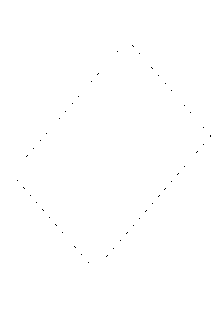

In [12]:
copy_array[copy_array < 1] = 0
copy_array[copy_array >= 1] = 255
copy_image = transforms.ToPILImage()(copy_array)
copy_image

In [13]:
find_position(copy_image)

array([ 12,  40, 199, 229])

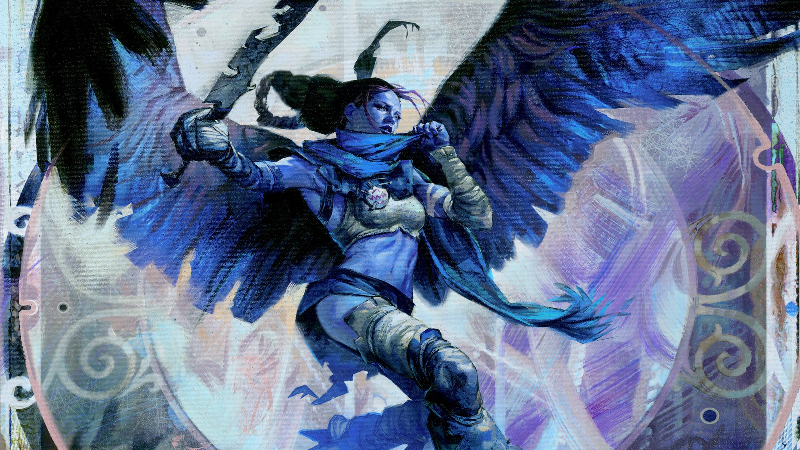

In [14]:
bg_path = select_background()
bg = ImageTransformer(bg_path, (800, 450), 0)
background = transforms.ToPILImage()(bg.image).convert("RGBA")
background

In [15]:
from random import randint

x = randint(0, background.size[0] - img.size[0])
y = randint(0, background.size[1] - img.size[1])

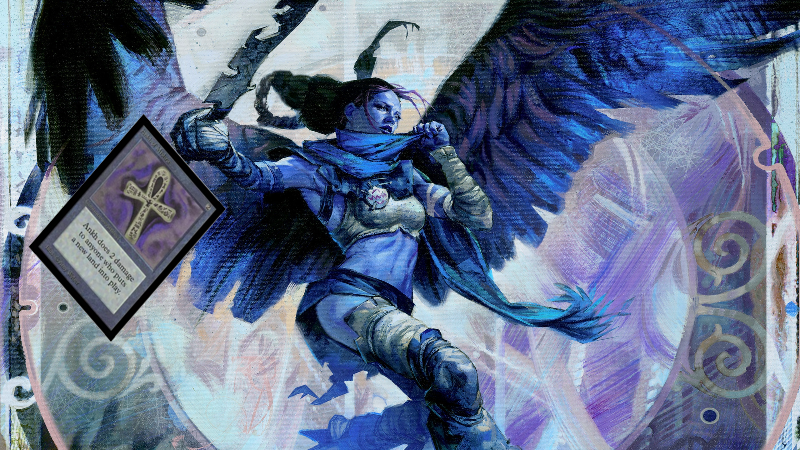

In [16]:
background.paste(img, (x, y), img)
background

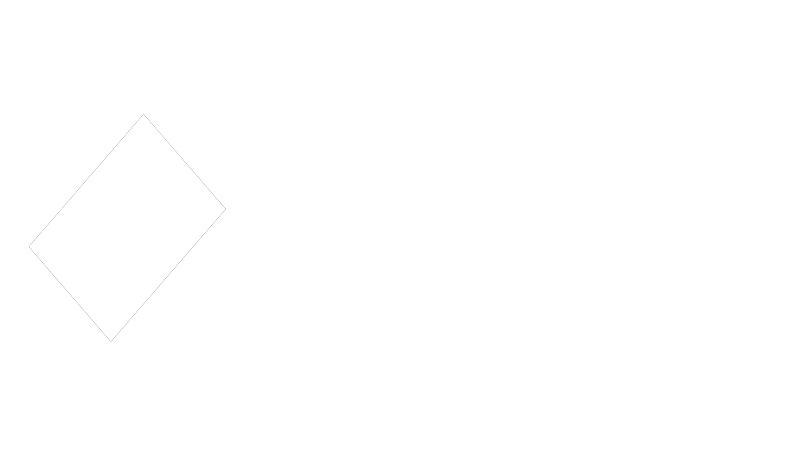

In [17]:
background_copy = np.zeros_like(background)
background_copy = transforms.ToPILImage()(background_copy)
background_copy.paste(copy, (x, y), copy)
background_copy

In [18]:
x, y

(16, 73)

In [19]:
background_copy = np.array(background_copy)
background_copy.shape

(450, 800, 4)

In [20]:
position = find_position(background_copy)
position

array([ 28, 113, 198, 229])

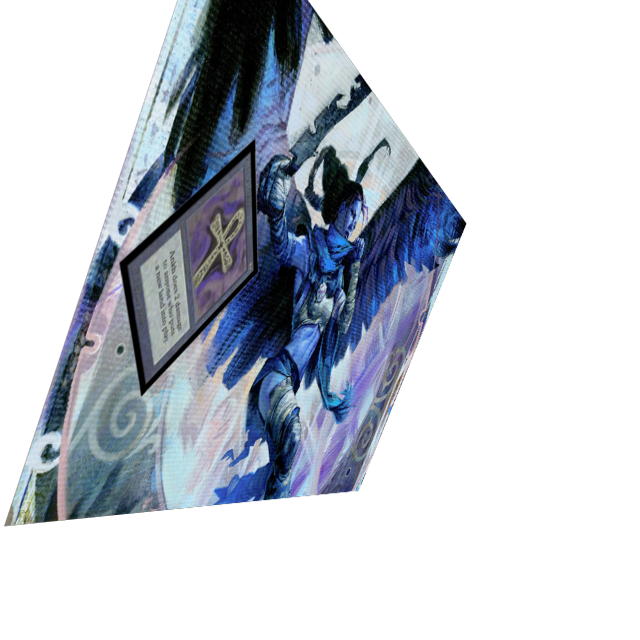

In [21]:
theta, phi, gamma = get_angles(max_theta=30, max_phi=30, max_gamma=15)
bg.image = bg.prepare_borders(np.array(background), BORDER_SIZE)
rotated_bg, _, M = bg.rotate_along_axis(theta=theta, phi=phi, gamma=gamma)
background = transforms.ToPILImage()(rotated_bg).resize((640, 640))
background

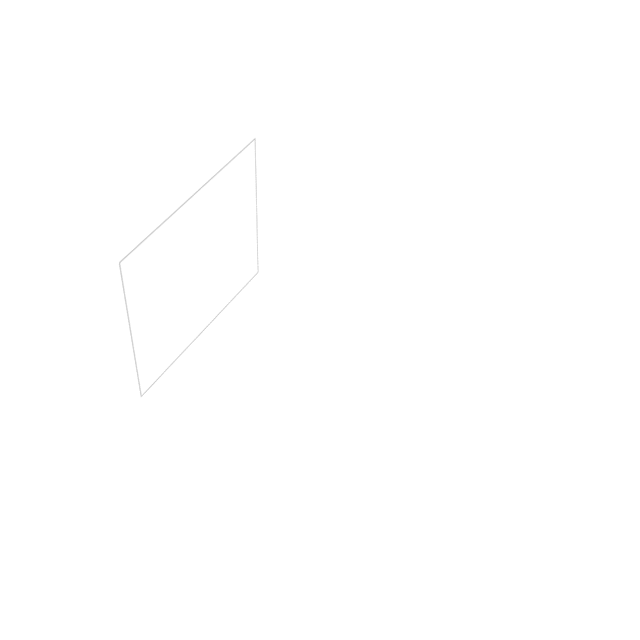

In [22]:
bg.image = bg.prepare_borders(np.array(background_copy), BORDER_SIZE)
rotated_bgc, _, M = bg.rotate_along_axis(theta=theta, phi=phi, gamma=gamma)
background_copy = transforms.ToPILImage()(rotated_bgc).resize((640, 640))
background_copy

In [23]:
position = find_position(background_copy)
position

array([118, 137, 141, 261])

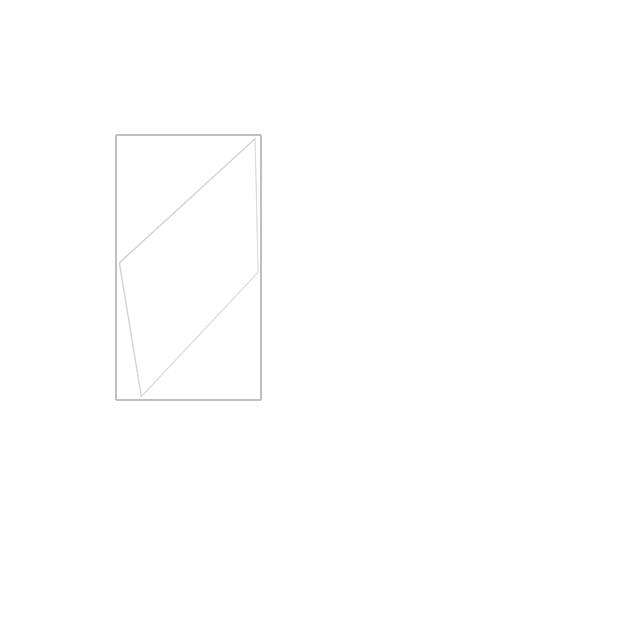

In [24]:
test_array = np.array(background_copy)
offsetx = position[0]
offsety = position[1]
width = position[2]
height = position[3]
test_array[offsety - 2:offsety + height + 2, offsetx - 3:offsetx - 1] = 120
test_array[offsety - 2:offsety + height + 2, offsetx + width + 1:offsetx + width + 3] = 120
test_array[offsety - 3:offsety - 1, offsetx - 2:offsetx + width + 2] = 120
test_array[offsety + height + 1:offsety + height + 3, offsetx - 2:offsetx + width + 2] = 120

test_bg = transforms.ToPILImage()(test_array)
test_bg

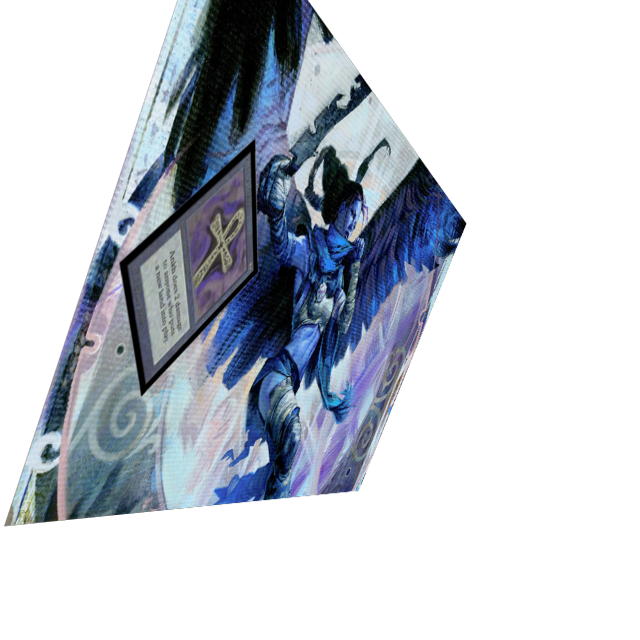

In [25]:
background

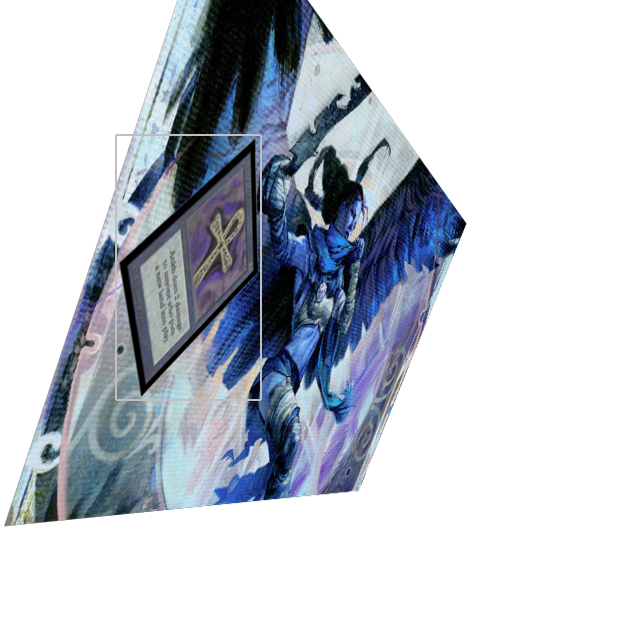

In [26]:
test_array = np.array(background)
offsetx = position[0]
offsety = position[1]
width = position[2]
height = position[3]
test_array[offsety - 2:offsety + height + 2, offsetx - 3:offsetx - 1] = 120
test_array[offsety - 2:offsety + height + 2, offsetx + width + 1:offsetx + width + 3] = 120
test_array[offsety - 3:offsety - 1, offsetx - 2:offsetx + width + 2] = 120
test_array[offsety + height + 1:offsety + height + 3, offsetx - 2:offsetx + width + 2] = 120

test_bg = transforms.ToPILImage()(test_array)
test_bg

In [27]:
np.array(background).shape

(640, 640, 4)

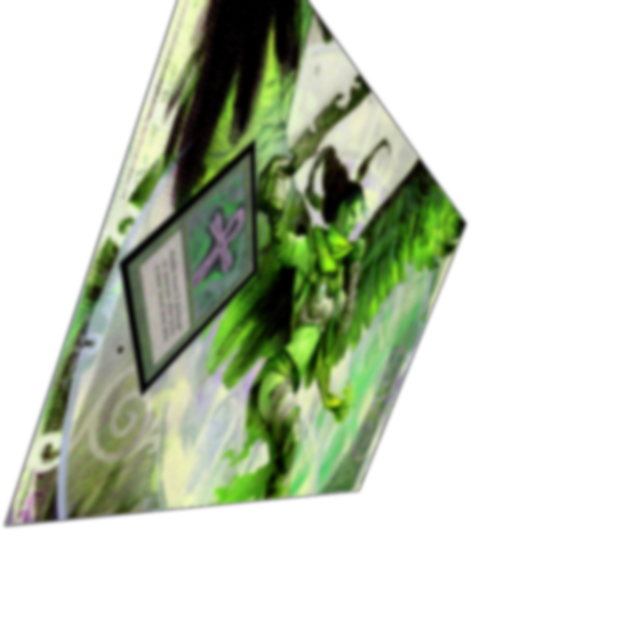

In [412]:
from PIL import ImageFilter

jitter = transforms.ColorJitter(brightness=(0.9, 1.25), contrast=(0.85, 1.15), saturation=(0.9, 1.5), hue=0.5)
to_jitter = transforms.ToPILImage()(np.array(background)[:,:,:3])
jittered_bg = np.array(jitter(to_jitter))
background_array = np.array(background)
background_array[:,:,:3] = jittered_bg
jittered_bg = transforms.ToPILImage()(background_array)
blurred_bg = jittered_bg.filter(ImageFilter.GaussianBlur())
blurred_bg

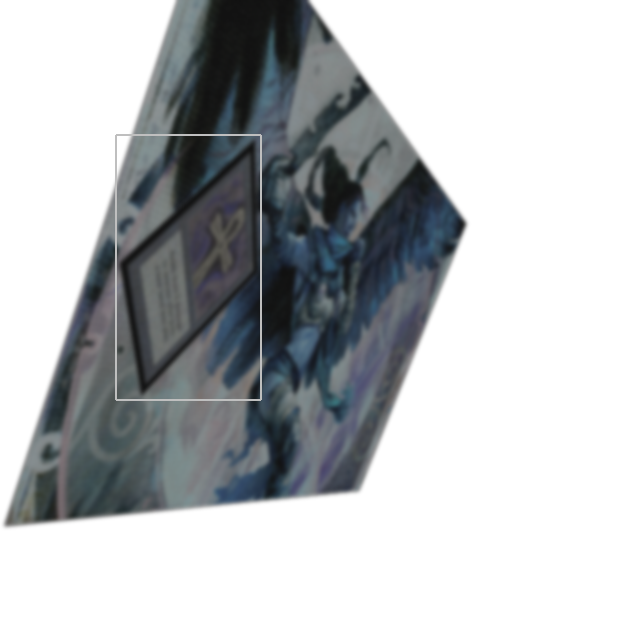

In [29]:
test_array = np.array(blurred_bg)
offsetx = position[0]
offsety = position[1]
width = position[2]
height = position[3]
test_array[offsety - 2:offsety + height + 2, offsetx - 3:offsetx - 1] = 120
test_array[offsety - 2:offsety + height + 2, offsetx + width + 1:offsetx + width + 3] = 120
test_array[offsety - 3:offsety - 1, offsetx - 2:offsetx + width + 2] = 120
test_array[offsety + height + 1:offsety + height + 3, offsetx - 2:offsetx + width + 2] = 120

test_bg = transforms.ToPILImage()(test_array)
test_bg

pasted to 619 165 (516, 720)
[[ 29  94 460 532]]
positions after augs:  [[288 199 105 202]] 



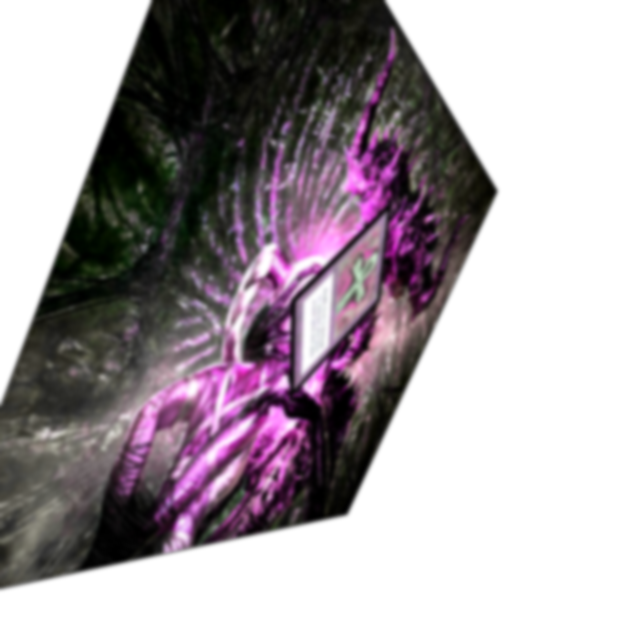

In [30]:
jitt, poss = augmentation_logic(path)
jitt

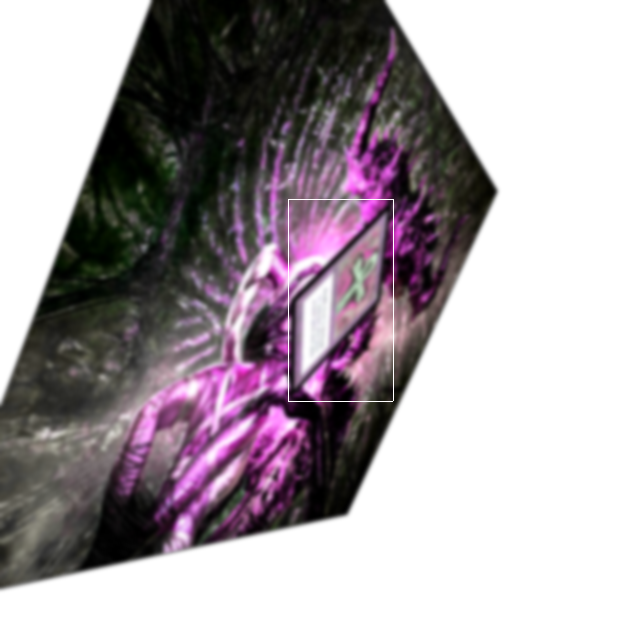

In [35]:
test_array = np.array(jitt)
position = poss[0]
offsetx = position[0]
offsety = position[1]
width = position[2]
height = position[3]

test_array[offsety:offsety + height, offsetx:offsetx+1] = 255
test_array[offsety:offsety + height, offsetx + width:offsetx + width + 1] = 255

test_array[offsety:offsety + 1, offsetx:offsetx + width] = 255
test_array[offsety + height:offsety + height + 1, offsetx:offsetx + width] = 255

test_bg = transforms.ToPILImage()(test_array)
test_bg